<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data_multi_delta_(4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n20.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,63.043492,-941.668106,-868.624614,-205.036224,-663.588390
1,0.0,1.0,77.272875,1800.975501,1888.248376,-291.880752,2180.129128
2,0.0,2.0,42.353836,359.906892,412.260728,-78.763482,491.024210
3,0.0,3.0,60.301144,-4938.336383,-4868.035239,-188.299174,-4679.736065
4,0.0,4.0,66.052182,-7146.985524,-7070.933342,-223.398809,-6847.534533
...,...,...,...,...,...,...,...
119995,999.0,115.0,41.998033,-960.509818,-908.511785,116.384271,-1024.896056
119996,999.0,116.0,47.772012,-4911.779355,-4854.007343,244.857859,-5098.865202
119997,999.0,117.0,55.737672,884.891657,950.629329,422.097340,528.531990
119998,999.0,118.0,24.728129,542.773558,577.501687,-267.878760,845.380447


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,63.043492,-941.668106,-868.624614,-205.036224,-663.588390
1,0.0,1.0,77.272875,1800.975501,1888.248376,-291.880752,2180.129128
2,0.0,2.0,42.353836,359.906892,412.260728,-78.763482,491.024210
3,0.0,3.0,60.301144,-4938.336383,-4868.035239,-188.299174,-4679.736065
4,0.0,4.0,66.052182,-7146.985524,-7070.933342,-223.398809,-6847.534533
...,...,...,...,...,...,...,...
119995,999.0,115.0,41.998033,-960.509818,-908.511785,116.384271,-1024.896056
119996,999.0,116.0,47.772012,-4911.779355,-4854.007343,244.857859,-5098.865202
119997,999.0,117.0,55.737672,884.891657,950.629329,422.097340,528.531990
119998,999.0,118.0,24.728129,542.773558,577.501687,-267.878760,845.380447


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y        y_hat        e_hat
rep   index                                                               
0.0   0.0    63.043492  -941.668106  -868.624614  -205.036224  -663.588390
      1.0    77.272875  1800.975501  1888.248376  -291.880752  2180.129128
      2.0    42.353836   359.906892   412.260728   -78.763482   491.024210
      3.0    60.301144 -4938.336383 -4868.035239  -188.299174 -4679.736065
      4.0    66.052182 -7146.985524 -7070.933342  -223.398809 -6847.534533
...                ...          ...          ...          ...          ...
999.0 115.0  41.998033  -960.509818  -908.511785   116.384271 -1024.896056
      116.0  47.772012 -4911.779355 -4854.007343   244.857859 -5098.865202
      117.0  55.737672   884.891657   950.629329   422.097340   528.531990
      118.0  24.728129   542.773558   577.501687  -267.878760   845.380447
      119.0  83.024084 -4591.278384 -4498.254300  1029.232140 -5527.486439

[120000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y        y_hat        e_hat
rep   index                                                               
0.0   0.0    63.043492  -941.668106  -868.624614  -205.036224  -663.588390
      1.0    77.272875  1800.975501  1888.248376  -291.880752  2180.129128
      2.0    42.353836   359.906892   412.260728   -78.763482   491.024210
      3.0    60.301144 -4938.336383 -4868.035239  -188.299174 -4679.736065
      4.0    66.052182 -7146.985524 -7070.933342  -223.398809 -6847.534533
...                ...          ...          ...          ...          ...
999.0 115.0  41.998033  -960.509818  -908.511785   116.384271 -1024.896056
      116.0  47.772012 -4911.779355 -4854.007343   244.857859 -5098.865202
      117.0  55.737672   884.891657   950.629329   422.097340   528.531990
      118.0  24.728129   542.773558   577.501687  -267.878760   845.380447
      119.0  83.024084 -4591.278384 -4498.254300  1029.232140 -5527.486439

[120000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,63.043492,-941.668106,-868.624614,-205.036224,-663.588390
1,0.0,1.0,77.272875,1800.975501,1888.248376,-291.880752,2180.129128
2,0.0,2.0,42.353836,359.906892,412.260728,-78.763482,491.024210
3,0.0,3.0,60.301144,-4938.336383,-4868.035239,-188.299174,-4679.736065
4,0.0,4.0,66.052182,-7146.985524,-7070.933342,-223.398809,-6847.534533
...,...,...,...,...,...,...,...
119995,999.0,115.0,41.998033,-960.509818,-908.511785,116.384271,-1024.896056
119996,999.0,116.0,47.772012,-4911.779355,-4854.007343,244.857859,-5098.865202
119997,999.0,117.0,55.737672,884.891657,950.629329,422.097340,528.531990
119998,999.0,118.0,24.728129,542.773558,577.501687,-267.878760,845.380447


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1            e            Y        y_hat        e_hat
rep   index                                                               
0.0   0.0    63.043492  -941.668106  -868.624614  -205.036224  -663.588390
      1.0    77.272875  1800.975501  1888.248376  -291.880752  2180.129128
      2.0    42.353836   359.906892   412.260728   -78.763482   491.024210
      3.0    60.301144 -4938.336383 -4868.035239  -188.299174 -4679.736065
      4.0    66.052182 -7146.985524 -7070.933342  -223.398809 -6847.534533
...                ...          ...          ...          ...          ...
999.0 115.0  41.998033  -960.509818  -908.511785   116.384271 -1024.896056
      116.0  47.772012 -4911.779355 -4854.007343   244.857859 -5098.865202
      117.0  55.737672   884.891657   950.629329   422.097340   528.531990
      118.0  24.728129   542.773558   577.501687  -267.878760   845.380447
      119.0  83.024084 -4591.278384 -4498.254300  1029.232140 -5527.486439

[120000 rows x 5 columns]

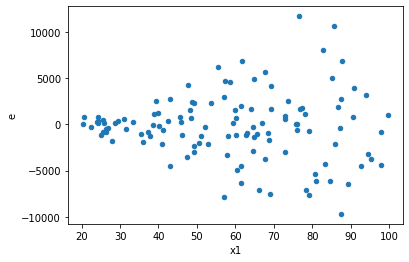

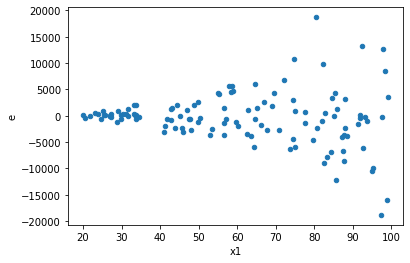

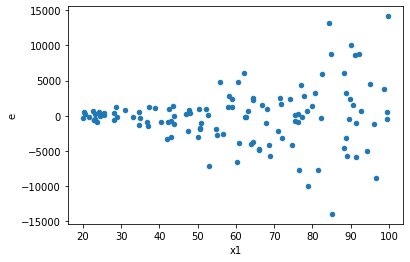

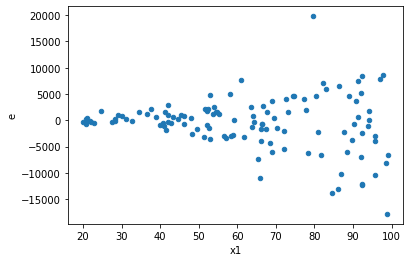

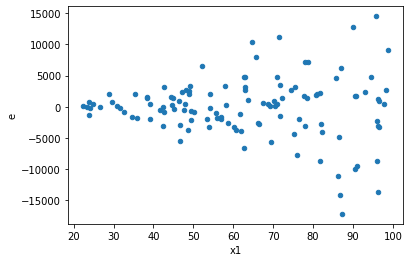

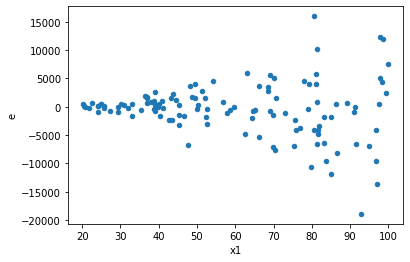

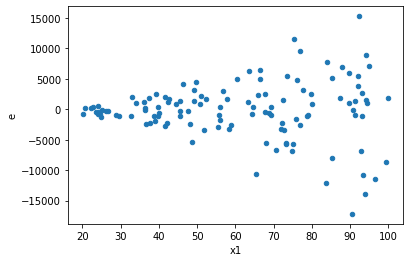

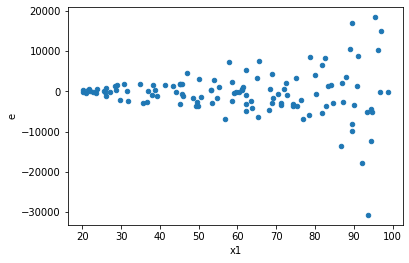

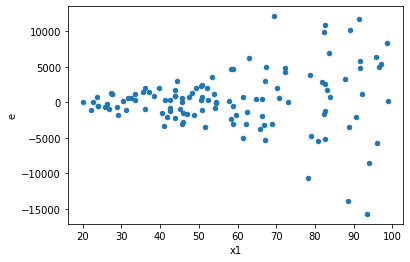

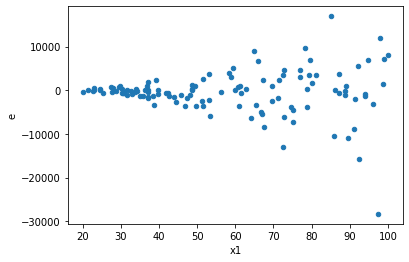

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x1')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,47.0,47.0,125676634.81269705,1079826216.9504797,2673970.9534616396,22975025.8925634,8.59210002368225,1.2876366639602566e-11,0.9999999999935618,6.438183319801283e-12,Reject001=0 : Heteroscedasticity
1.0,47.0,47.0,77230079.79375446,2462403042.9266148,1643193.1871011588,52391554.10482159,31.88398936661137,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
2.0,47.0,47.0,95794873.70037863,1504482027.312623,2038188.8021357155,32010255.900268573,15.705245690059055,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,47.0,47.0,113619394.98396322,2394974624.7536845,2417433.9358290047,50956906.90965286,21.078924290097852,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
4.0,47.0,47.0,206291984.22001764,2130958149.6850803,4389191.153617397,45339535.09968256,10.329815565748492,3.7569947153315297e-13,0.9999999999998122,1.8784973576657649e-13,Reject001=0 : Heteroscedasticity
5.0,47.0,47.0,124980916.04093519,2271491473.1465635,2659168.426402876,48329605.81162901,18.17470654801873,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
6.0,47.0,47.0,150049268.14475882,2186668928.4429526,3192537.6201012516,46524870.81793516,14.573006289729992,4.440892098500626e-16,0.9999999999999998,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,47.0,47.0,142789281.60033804,3436277785.1854725,3038069.821283788,73112293.30181856,24.065376243039644,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
8.0,47.0,47.0,95165738.86787926,1818441640.5624433,2024802.9546357288,38690247.67154135,19.10815449126105,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,47.0,125676634.81269705,1079826216.9504797,2673970.9534616396,22975025.8925634,8.59210002368225,1.2876366639602566e-11,Reject001=0 : Heteroscedasticity
1.0,47.0,47.0,77230079.79375446,2462403042.9266148,1643193.1871011588,52391554.10482159,31.88398936661137,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,47.0,47.0,95794873.70037863,1504482027.312623,2038188.8021357155,32010255.900268573,15.705245690059055,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,47.0,47.0,113619394.98396322,2394974624.7536845,2417433.9358290047,50956906.90965286,21.078924290097852,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,47.0,47.0,206291984.22001764,2130958149.6850803,4389191.153617397,45339535.09968256,10.329815565748492,3.7569947153315297e-13,Reject001=0 : Heteroscedasticity
5.0,47.0,47.0,124980916.04093519,2271491473.1465635,2659168.426402876,48329605.81162901,18.17470654801873,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,47.0,47.0,150049268.14475882,2186668928.4429526,3192537.6201012516,46524870.81793516,14.573006289729992,4.440892098500626e-16,Reject001=0 : Heteroscedasticity
7.0,47.0,47.0,142789281.60033804,3436277785.1854725,3038069.821283788,73112293.30181856,24.065376243039644,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,47.0,47.0,95165738.86787926,1818441640.5624433,2024802.9546357288,38690247.67154135,19.10815449126105,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64